<a href="https://colab.research.google.com/github/GuilhermePelegrina/Mackenzie/blob/main/Aulas/TIC/Aula_13_Redes_neurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Redes Neurais</font></h1>
<hr>

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Neurônio simples

Um neurônio simples é a **unidade básica de processamento** em uma rede neural artificial. Ele é inspirado no neurônio biológico encontrado no cérebro humano e consiste em uma ou mais entradas que são somadas ponderadamente, seguidas de uma função de ativação que produz uma saída.

<img src="http://www.orlandoalbarracin.com.br/phyton/neuronio.png" width=550, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

As funções de ativação, $\varphi ()$, são aplicadas em redes neurais para determinar a saída de um neurônio. Sejam $x_1,...,x_n$ os valores de entrada e $w_1,...., w_n$ os pesos, então,

$$ f(X) = \varphi(w_1 x_1 + ... + w_n x_n ) $$.

Os pesos $w_i$ são determinados de tal forma que o erro de predição (valor observado - valor previsto pelo modelo) seja minimizado.

Algumas das funções de ativação mais comuns são:

*   Função Sigmoide: mapeia um número para um valor entre 0 e 1, permitindo a saída de valores de probabilidade.
*   Função Tanh: mapeia um número para um valor entre -1 e 1.
*   Função Softmax: é usada em problemas de classificação e normaliza as saídas para que a soma das saídas seja igual a 1.

A função sigmoid é definida:

$$f(x) = \dfrac{1}{1 + e^{-x}}$$

em que x é a entrada e f(x) é a saída. A sigmoid é diferenciável em todos os pontos, o que a torna útil para treinamento de redes neurais usando algoritmos de otimização baseados em gradiente.

## Limitações

*   Dificuldade em lidar com dados não lineares: Modelam relações lineares entre as variáveis de entrada e saída.

*   Dificuldade em lidar com problemas complexos: Os neurônios simples são adequados apenas para problemas simples.

*   Tendência ao overfitting: Os neurônios simples são propensos a overfitting. Isso ocorre quando a rede é ajustada demais aos dados de treinamento e não generaliza bem para novos dados.

Assim, um único neurônio somente tem capacidade para fazer a separação de conjuntos linearmente separáveis. Para resolver essa limitação podemos então trabalhar com múltiplos neurônios em camadas.

As saídas dos neurônios de uma camada são então empregadas como entradas para a seguinte camada.

Os neurônios que estão entre a camada de entrada e a camada de saída é chamado de Camadas ocultas **(hidden layers)**. Essas camadas são chamadas de "ocultas" porque não se comunicam diretamente com o usuário. O objetivo delas é transformar os dados de entrada em um formato mais útil para o aprendizado da rede.

<img src="http://www.orlandoalbarracin.com.br/phyton/neuronio2.png" width=550, align="left">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

Cada camada oculta tem um conjunto de pesos que são ajustados durante o processo de treinamento para minimizar o erro da rede. A adição de camadas ocultas aumenta a capacidade da rede neural de capturar relações complexas entre as variáveis de entrada e saída


O treinamento da rede segue o mesmo princípio, embora mais complexo, ajustando os pesos $w_n$ de acordo com o erro de predição obtido para se estimar a saída $y$. Chamamos esse aprendizado de *backpropagation* ou *retropropagação*.

Acesse agora http://playground.tensorflow.org/ para uma demonstração.

Esse [artigo](http://meusite.mackenzie.br/rogerio/ML/The-InfoQ-eMag-Introduction-to-Machine-Learning.pdf) trás uma ótima introdução ao Aprendizado de Máquina. Nele há uma aplicação de dois modelos de classificação,**Árvores de Decisão e Regressão Logística**, para um conjunto de dado simples para detecção de fraude em operações de cartões de crédito.

In [ ]:
pd.read_csv("/content/qconlondon2016_sample_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/content/qconlondon2016_sample_data.csv'

# **Case**: Detecção de Fraude em Operações de Cartão de Crédito





Aqui você vamos empregar o conjunto de dados:

URL: https://meusite.mackenzie.br/rogerio/ML/qconlondon2016_sample_data.csv

Vamos usar a biblioteca `Keras` para usar redes neurais. A aplicação consiste em treinar o modelo para identificar se uma operação é um fraude ou não.

**IMPORTANTE**
O uso de deeplearning pode ser bastante complexo e exigiria um bom tempo para estarmos aptos a empregar suas funções em diferentes problemas. Entenda esse exemplo como uma *degustação* do deep learning apenas para que você possa fixar os conceitos dessa técnica.

### Explorando os dados


In [ ]:
fraud = pd.read_csv("/content/qconlondon2016_sample_data.csv")
fraud.drop(columns=['charge_time'],inplace=True) # por simplicidade excluímos esse dado do treinamento

fraud.head()

,fraudulent,amount,card_country,card_use_24h
0,False,20484,US,0
1,False,1211,US,0
2,False,8396,US,1
3,False,2359,US,0
4,False,1480,US,3


### Preparando os dados `X` e `y`

Na preparação dos dados é necessário:

*   **Hot encode** dos atributos não numéricos,
*   **Normalizar** (rescaling) os dados
*   Formatar os dados para os padrões do **TensorFlow/Keras** (formato de matrizes e não dataframes).

In [ ]:
# Variáveis de entrada

X = fraud.drop(columns=['fraudulent'])

X_number = X.select_dtypes(include='number')
X_categorical = X.select_dtypes(exclude='number')

X_categorical

,card_country
0,US
1,US
2,US
3,US
4,US
...,...
89388,US
89389,US
89390,US
89391,US


In [ ]:
X=pd.concat([X_number, pd.get_dummies(X_categorical)],axis=1)
X

,amount,card_use_24h,card_country_AU,card_country_GB,card_country_US
0,20484,0,False,False,True
1,1211,0,False,False,True
2,8396,1,False,False,True
3,2359,0,False,False,True
4,1480,3,False,False,True
...,...,...,...,...,...
89388,2005,7,False,False,True
89389,99650,1,False,False,True
89390,260645,27,False,False,True
89391,885549,26,False,False,True


In [ ]:
# Normalizando os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)


X_matrix = scaler.transform(X)
X = pd.DataFrame(X_matrix,columns=X.columns)
X

,amount,card_use_24h,card_country_AU,card_country_GB,card_country_US
0,0.268680,-0.172967,-0.156796,-0.178289,0.240791
1,-0.197635,-0.172967,-0.156796,-0.178289,0.240791
2,-0.023792,-0.128086,-0.156796,-0.178289,0.240791
3,-0.169859,-0.172967,-0.156796,-0.178289,0.240791
4,-0.191127,-0.038324,-0.156796,-0.178289,0.240791
...,...,...,...,...,...
89388,-0.178424,0.141200,-0.156796,-0.178289,0.240791
89389,2.184120,-0.128086,-0.156796,-0.178289,0.240791
89390,6.079432,1.038820,-0.156796,-0.178289,0.240791
89391,21.199133,0.993939,-0.156796,-0.178289,0.240791


In [ ]:
# Valores de saída

y=fraud.fraudulent.replace({True:1, False:0})

In [ ]:
## Separando os dados de Treinamento e Teste
from sklearn.model_selection import train_test_split

seed = 1984
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=seed)

### Adequando os dados para o `Keras`

Os dados são reformatados em matrizes e a saída em uma matriz binária.

In [ ]:
Xm = np.matrix(X_train)
ym = np.transpose(np.matrix(y_train))

In [ ]:
from keras.utils import to_categorical
y_binary = to_categorical(ym)

### Configuração e Treinamento da Rede DeepLearning

Nossa rede terá:


*   5 neurônios de entrada, correspondendo a cada atributo de entrada
*   2 camadas ocultas de 8 neurônios cada
*   1 camada de saída com 2 neurônios correspondendo às duas classes de saída

Usaremos a função de ativaçã: sigmoid.

```
model = Sequential([layers.Dense(5, activation='sigmoid', input_shape=[Xm.shape[1],])])

model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
```



In [ ]:
from keras import Sequential, layers

all_results = []

# Definição

model = Sequential([layers.Dense(5, activation='sigmoid', input_shape=[5,])]) # 5 é o número de atributos de entrada


model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(8, activation='sigmoid'))
model.add(layers.Dense(2, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento
history = model.fit(Xm, y_binary, validation_split=0.2, epochs=100)


Epoch 1/100
1565/1565 [==============================] - 6s 3ms/step - loss: 0.6960 - accuracy: 0.5242 - val_loss: 0.6865 - val_accuracy: 0.5903
Epoch 2/100
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6671 - accuracy: 0.6229 - val_loss: 0.6411 - val_accuracy: 0.6543
Epoch 3/100
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6252 - accuracy: 0.6654 - val_loss: 0.6186 - val_accuracy: 0.6703
Epoch 4/100
1565/1565 [==============================] - 4s 3ms/step - loss: 0.6153 - accuracy: 0.6712 - val_loss: 0.6154 - val_accuracy: 0.6749
Epoch 5/100
1565/1565 [==============================] - 4s 3ms/step - loss: 0.6140 - accuracy: 0.6716 - val_loss: 0.6149 - val_accuracy: 0.6721
Epoch 6/100
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6136 - accuracy: 0.6740 - val_loss: 0.6157 - val_accuracy: 0.6722
Epoch 7/100
1565/1565 [==============================] - 3s 2ms/step - loss: 0.6136 - accuracy: 0.6725 - val_loss: 0.6156 - val_ac

O Treinamento busca a cada etapa minimizar o erro (aumentar a acuracidade). Isso entretanto não ocorre de maneira regular.

O Treinamento pode ser concluído quando se chega a uma determinado erro desejado ou após um certo número de iterações, uma vez que o modelo pode não convergir.

In [ ]:
#@markdown executar!
def plot_loss_acc(history,more_title=''):

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(8,5))
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(8,5))
    plt.plot(epochs, acc, 'y', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy' + ' ' + more_title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    print(more_title + 'Accuracy Train: {:.2f} %, Accuracy Test: {:.2f} %'.format(acc[len(acc)-1] *100, val_acc[len(val_acc)-1]*100))

    return loss, val_loss, acc, val_acc

print('completed!')

completed!


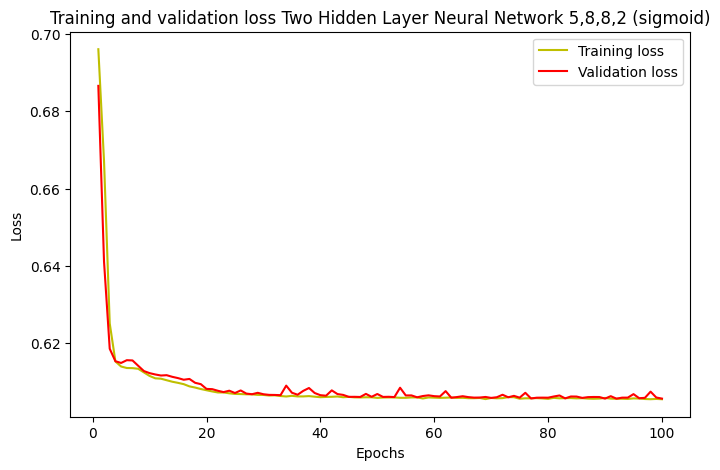

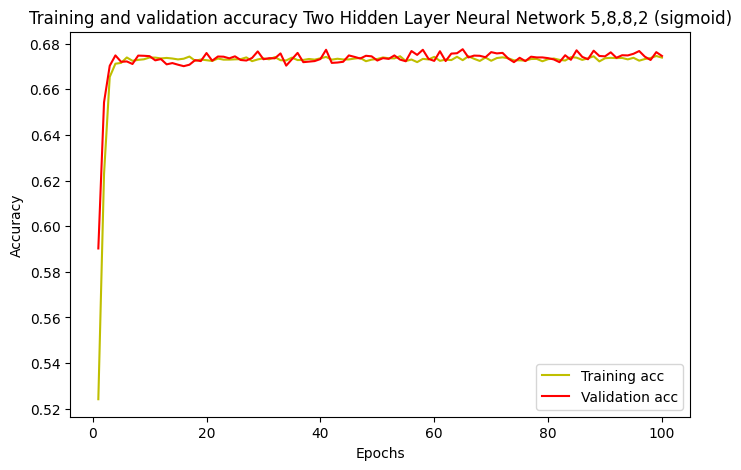

Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)Accuracy Train: 67.39 %, Accuracy Test: 67.46 %


In [ ]:
loss, val_loss, acc, val_acc = plot_loss_acc(history,'Two Hidden Layer Neural Network 5,8,8,2 (sigmoid)')

Em cada neurônio de saída a rede retorna a probabilidade da classe. A seleção do neurônio de maior valor a classe mais provável (`np.argmax()`).

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Predição
Xm = np.matrix(X_test )
y_pred = np.argmax(model.predict(Xm), axis=-1)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

839/839 [==============================] - 1s 2ms/step
[[10193  3359]
 [ 5516  7750]]
              precision    recall  f1-score   support

           0       0.65      0.75      0.70     13552
           1       0.70      0.58      0.64     13266

    accuracy                           0.67     26818
   macro avg       0.67      0.67      0.67     26818
weighted avg       0.67      0.67      0.67     26818



### Overfitting ou sobreajuste
Se a acurácia do conjunto de treinamento for significativamente maior do que a acurácia do conjunto de teste, é um sinal de overfitting. Isso indica que o modelo está muito ajustado aos dados de treinamento e não é capaz de generalizar para novos dados. Para evitar o overfitting, é necessário ajustar a complexidade do modelo, aumentar o tamanho do conjunto de treinamento ou aplicar técnicas de regularização, como dropout e L2 regularization.